In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
# Specify the file name
file_name = 'training_set_VU_DM.csv'

# Specify the full file path
file_path = r'C:\Users\jeroe\OneDrive\Documenten\3. VU\Master Econometrics\Data Mining Techniques\Assignment 2\\' + file_name

# Read the dataset using pandas
df = pd.read_csv(file_path)

In [171]:
pd.set_option('display.max_columns', None)

In [172]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [173]:
# dropping irrelevant variables
df = df.drop(['date_time', 'site_id', 'srch_destination_id', 'position', 'gross_bookings_usd', 'comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 
'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff', 'random_bool'], axis=1)

In [174]:
# create score variable
conditions = [
    (df['booking_bool'] == 1),
    (df['booking_bool'] == 0) & (df['click_bool'] == 1),
    (df['booking_bool'] == 0) & (df['click_bool'] == 0)
]

choices = [5, 1, 0]

df['score'] = np.select(conditions, choices, default=np.nan)

In [175]:
# Extreme values - price usd
# Set every value above 10k to missing
df.loc[df['price_usd'] > 10000, 'price_usd'] = np.nan

In [176]:
# New variables - diff
df["starrating_diff"] = abs(df["visitor_hist_starrating"] - df["prop_starrating"])
df["usd_diff"] = abs(df["visitor_hist_adr_usd"] - df["price_usd"])
df = df.drop(["visitor_hist_starrating", "visitor_hist_adr_usd"], axis = 1)

In [177]:
# New variables - competitor
df['avg_comp_rate'] = df[['comp1_rate', 'comp2_rate', 'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate', 'comp8_rate']].mean(axis=1)
df['avg_comp_inv'] = df[['comp1_inv', 'comp2_inv', 'comp3_inv', 'comp4_inv', 'comp5_inv', 'comp6_inv', 'comp7_inv', 'comp8_inv']].mean(axis=1)
df = df.drop(['comp1_rate', "comp1_inv", 'comp2_rate', "comp2_inv", 'comp3_rate', "comp3_inv", 'comp4_rate', "comp4_inv", 'comp5_rate', "comp5_inv", 'comp6_rate', "comp6_inv", 'comp7_rate', "comp7_inv", 'comp8_rate', "comp8_inv"], axis = 1)

In [178]:
# New variables - abroad
df['abroad_bool'] = (df['visitor_location_country_id'] != df['prop_country_id']).astype(int)

In [179]:
# New variables - children
df['children_bool'] = (df['srch_children_count'] > 0).astype(int)
df = df.drop('srch_children_count', axis=1)

In [180]:
# Recode - prop_log_historical_price: replace 0 with missing, since 0 is basically missing in this case
df['prop_log_historical_price'] = df['prop_log_historical_price'].replace(0, df['prop_log_historical_price'].median())

In [181]:
print(df.columns)
df.head()

Index(['srch_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id',
       'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_room_count', 'srch_saturday_night_bool',
       'srch_query_affinity_score', 'orig_destination_distance', 'click_bool',
       'booking_bool', 'score', 'starrating_diff', 'usd_diff', 'avg_comp_rate',
       'avg_comp_inv', 'abroad_bool', 'children_bool'],
      dtype='object')


,srch_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,promotion_flag,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,click_bool,booking_bool,score,starrating_diff,usd_diff,avg_comp_rate,avg_comp_inv,abroad_bool,children_bool
0,1,187,219,893,3,3.5,1,2.83,0.0438,4.95,104.77,0,1,0,4,1,1,NaN,NaN,0,0,0.0,NaN,NaN,0.00,0.000000,1,0
1,1,187,219,10404,4,4.0,1,2.20,0.0149,5.03,170.74,0,1,0,4,1,1,NaN,NaN,0,0,0.0,NaN,NaN,0.00,0.333333,1,0
2,1,187,219,21315,3,4.5,1,2.20,0.0245,4.92,179.80,0,1,0,4,1,1,NaN,NaN,0,0,0.0,NaN,NaN,0.00,0.000000,1,0
3,1,187,219,27348,2,4.0,1,2.83,0.0125,4.39,602.77,0,1,0,4,1,1,NaN,NaN,0,0,0.0,NaN,NaN,-0.75,0.250000,1,0
4,1,187,219,29604,4,3.5,1,2.64,0.1241,4.93,143.58,0,1,0,4,1,1,NaN,NaN,0,0,0.0,NaN,NaN,0.00,0.000000,1,0


#### Impute Missings

In [182]:
# Select columns with missing values
cols_with_missing = df.columns[df.isnull().any()].tolist()
# Get the count, number of unique values, and value counts (including missing values) for each column
counts = pd.DataFrame({'count': df[cols_with_missing].count(), 'unique': df[cols_with_missing].nunique(), 'missing': df[cols_with_missing].isnull().sum()})

# Print the result
print(counts)


                             count  unique  missing
prop_review_score          4950983      10     7364
prop_location_score2       3867999    9342  1090348
price_usd                  4956354   74621     1993
srch_query_affinity_score   317406  199387  4640941
orig_destination_distance  3350565  530595  1607782
starrating_diff             251866     624  4706481
usd_diff                    252986   64409  4705361
avg_comp_rate              3241539      32  1716808
avg_comp_inv               3352374      26  1605973


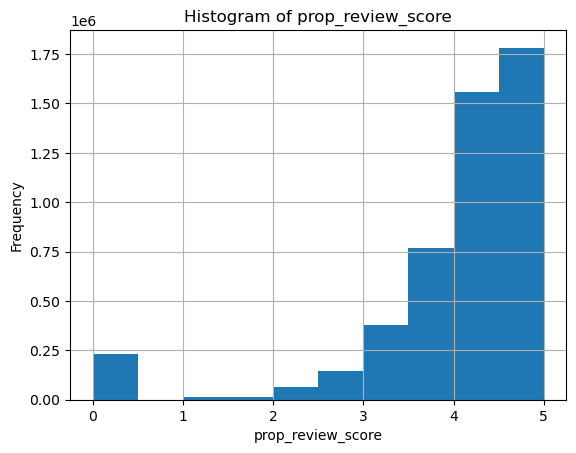

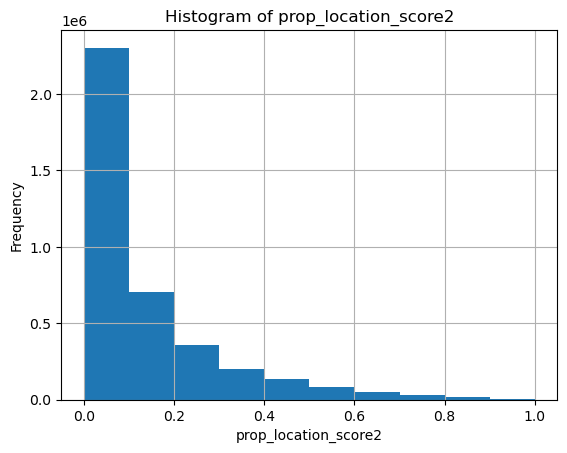

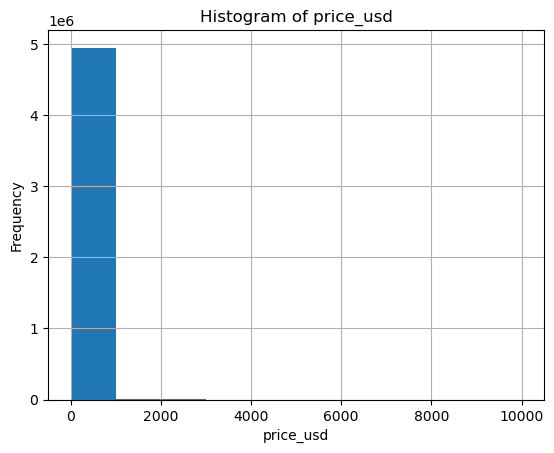

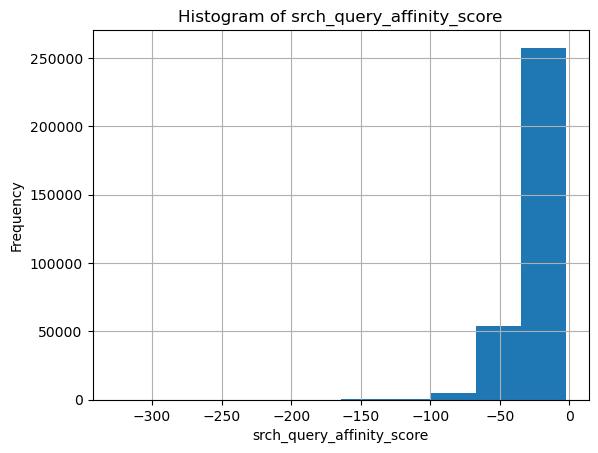

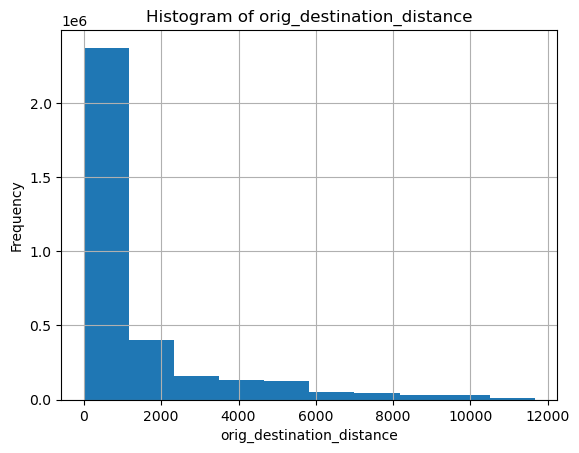

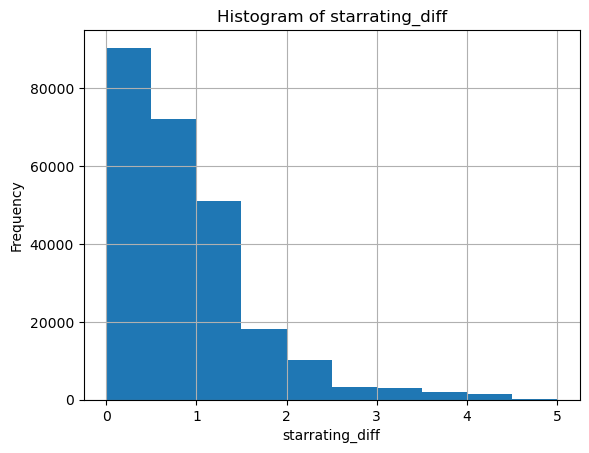

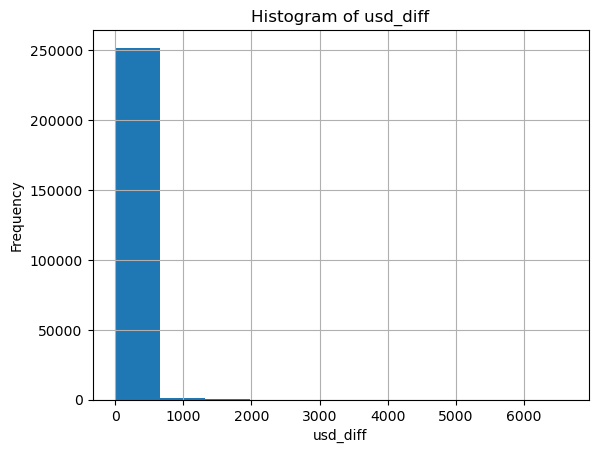

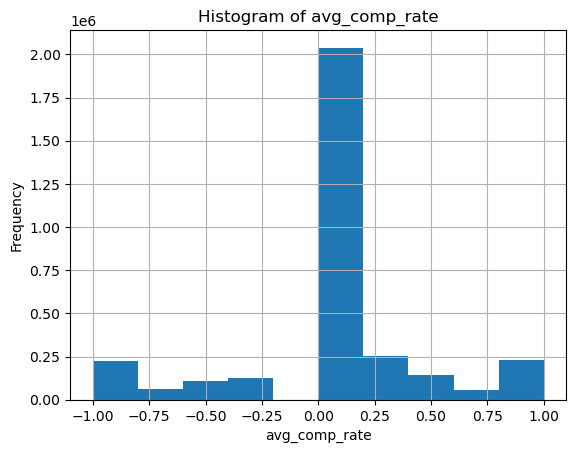

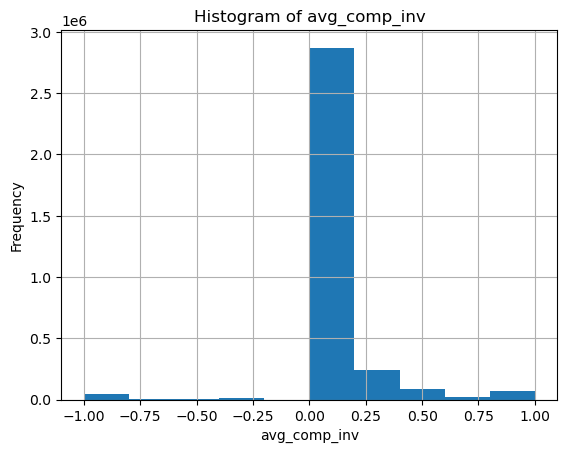

In [183]:
# Select columns with missing values
cols_with_missing = df.columns[df.isnull().any()].tolist()

# Loop through columns to plot
for col in df[cols_with_missing]:
    plt.figure()
    df[col].hist()
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

In [184]:
#prop_review_score, price_usd: impute with median
df['prop_review_score'] = df['prop_review_score'].fillna(df['prop_review_score'].median())
df['price_usd'] = df['price_usd'].fillna(df['price_usd'].median())

#prop_location_score2: impute with minimum
df['prop_location_score2'] = df['prop_location_score2'].fillna(df['prop_location_score2'].min())

# orig_destination_distance: impute based on average of 'orig_destination_distance' per combination of country_id and visitor_location_country_id
# Calculate the average per combination of country_id and visitor_location_country_id
average_distance = df.groupby(['prop_country_id', 'visitor_location_country_id'])['orig_destination_distance'].transform('median')
df['orig_destination_distance'] = df['orig_destination_distance'].fillna(average_distance) # Impute missing values with the average distance
df = df.drop(['visitor_location_country_id','prop_country_id'], axis=1)

#avg_comp_rate, avg_comp_inv: impute with 0
df['avg_comp_rate'] = df['avg_comp_rate'].fillna(0)
df['avg_comp_inv'] = df['avg_comp_inv'].fillna(0)

In [185]:
#df['orig_destination_distance'] still has some missings. So i decided to go ahead and impute the rest with median
df['orig_destination_distance'] = df['orig_destination_distance'].fillna(df['orig_destination_distance'].median())

In [186]:
df.columns

Index(['srch_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_room_count', 'srch_saturday_night_bool',
       'srch_query_affinity_score', 'orig_destination_distance', 'click_bool',
       'booking_bool', 'score', 'starrating_diff', 'usd_diff', 'avg_comp_rate',
       'avg_comp_inv', 'abroad_bool', 'children_bool'],
      dtype='object')

In [187]:
#srch_query_affinity_score, starrating_diff, usd_diff, turn into dummies [high, low, missing]
# List of columns for which you want to create dummies
dummy_cols = ['srch_query_affinity_score', 'starrating_diff', 'usd_diff']

# Loop through selected columns and apply binning
for col in dummy_cols:
    bins = [-np.inf, df[col].quantile(0.50), np.inf]
    labels = ['low', 'high']
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
# Convert columns to dummies
df = pd.get_dummies(df, columns=dummy_cols, dummy_na=True)

# #drop missing dummies, to avoid multicollinearity
dummy_drop = ['srch_query_affinity_score_nan', 'starrating_diff_nan', 'usd_diff_nan']
df = df.drop(dummy_drop, axis=1)

In [188]:
# no missings
pd.set_option('display.max_rows', 150)
counts = pd.DataFrame({'count': df.count(), 'unique': df.nunique(), 'missing': df.isnull().sum()})
counts

,count,unique,missing
srch_id,4958347,199795,0
prop_id,4958347,129113,0
prop_starrating,4958347,6,0
prop_review_score,4958347,10,0
prop_brand_bool,4958347,2,0
prop_location_score1,4958347,337,0
prop_location_score2,4958347,9342,0
prop_log_historical_price,4958347,391,0
price_usd,4958347,74621,0
promotion_flag,4958347,2,0


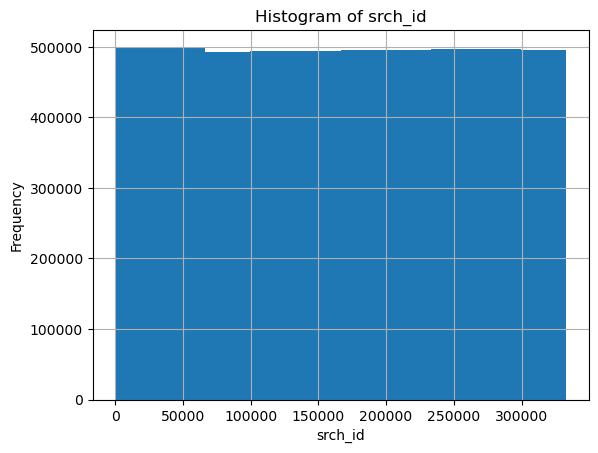

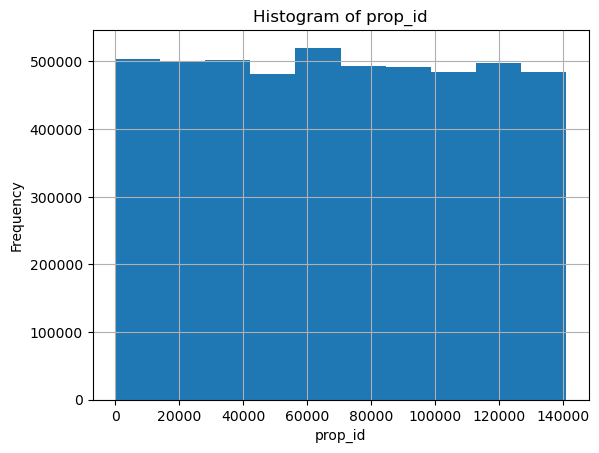

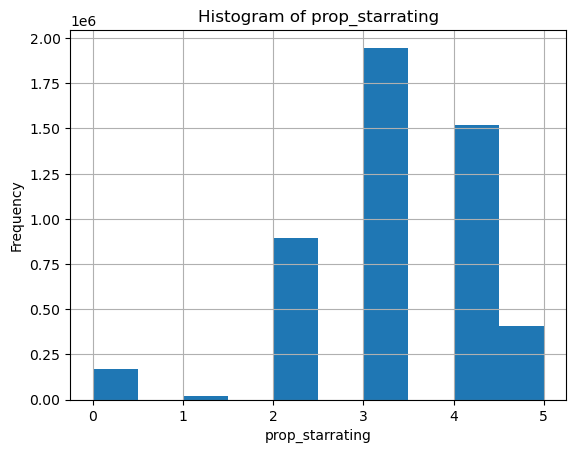

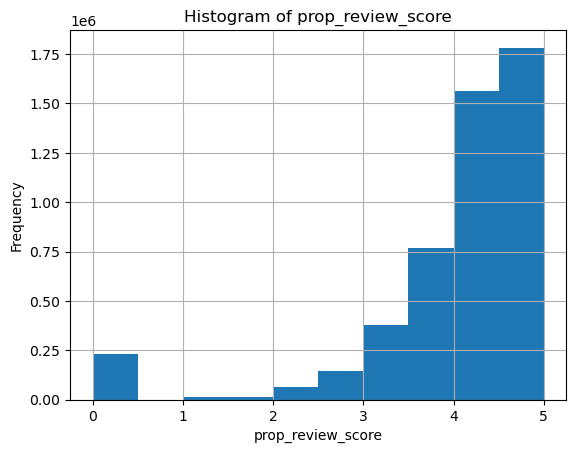

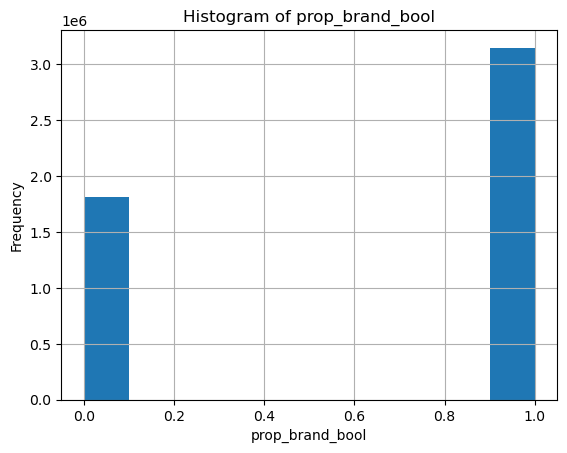

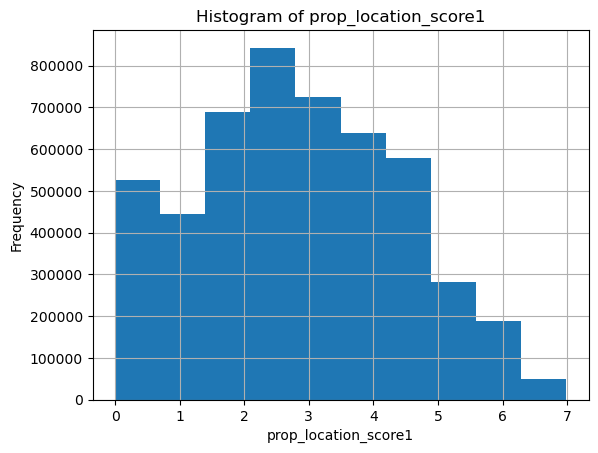

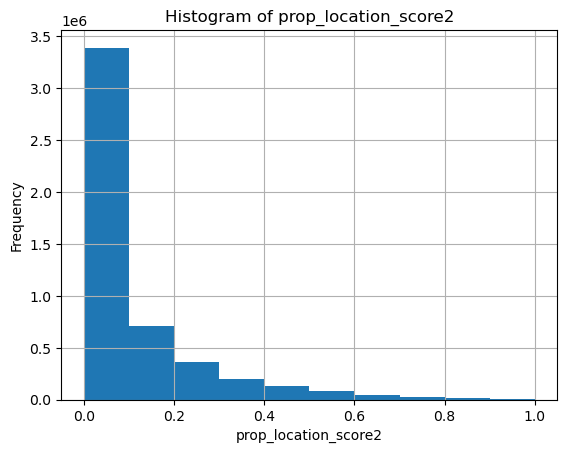

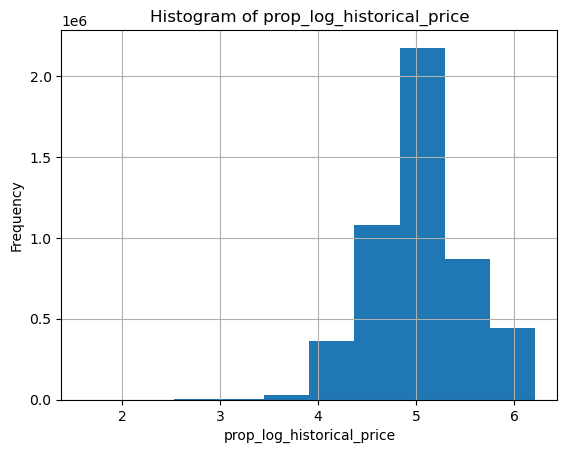

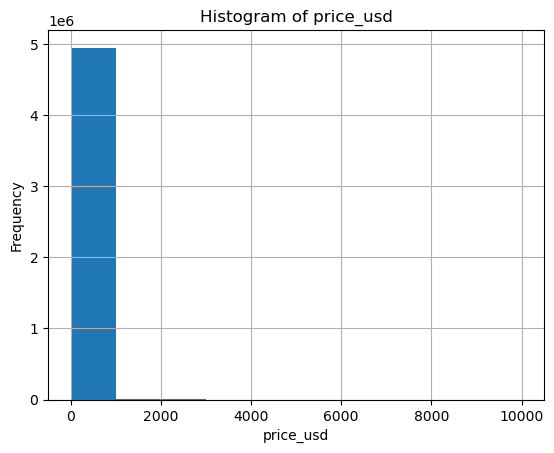

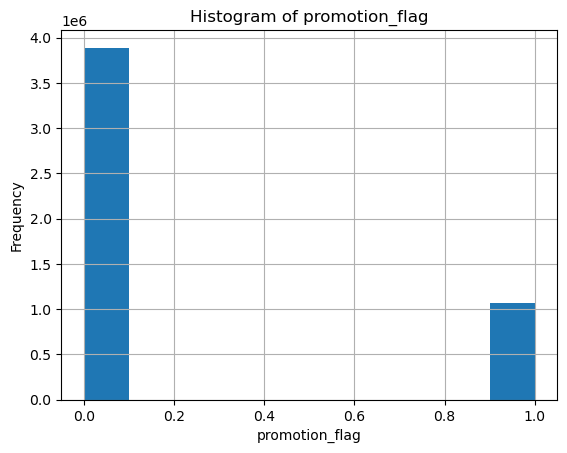

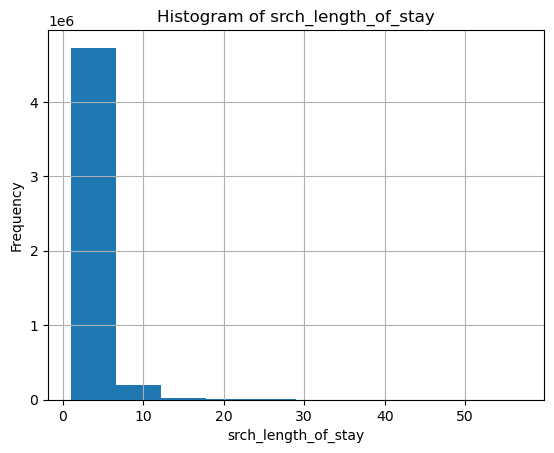

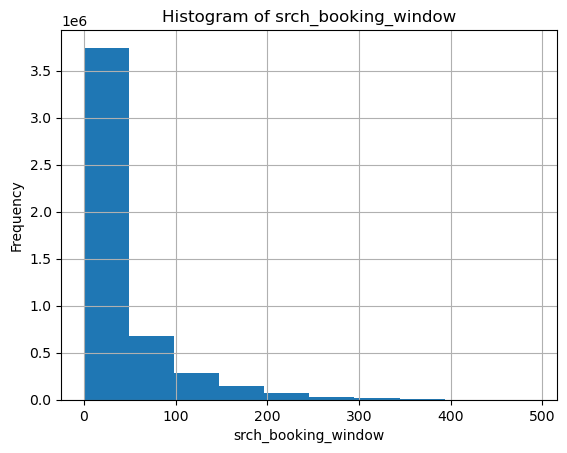

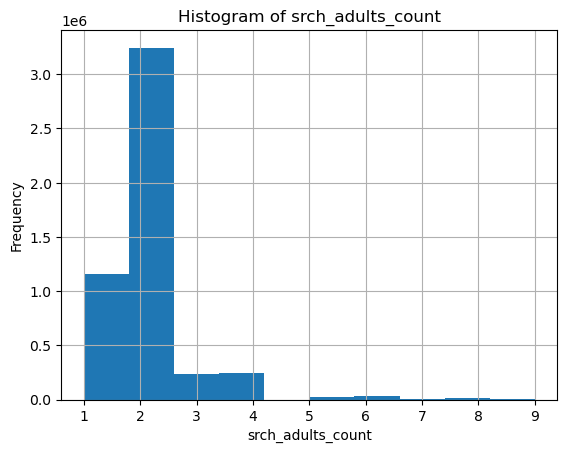

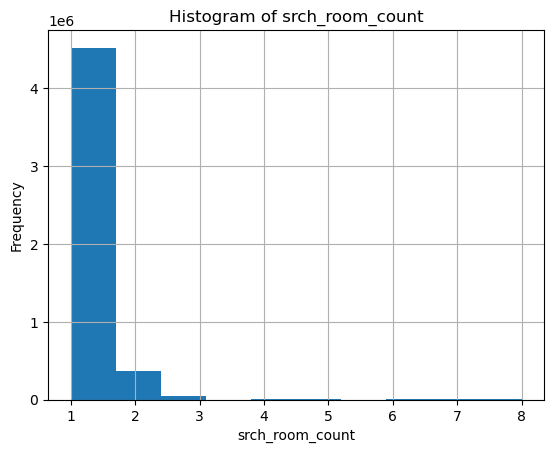

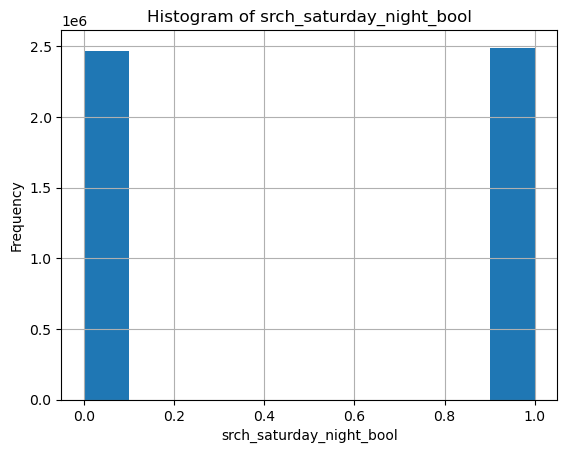

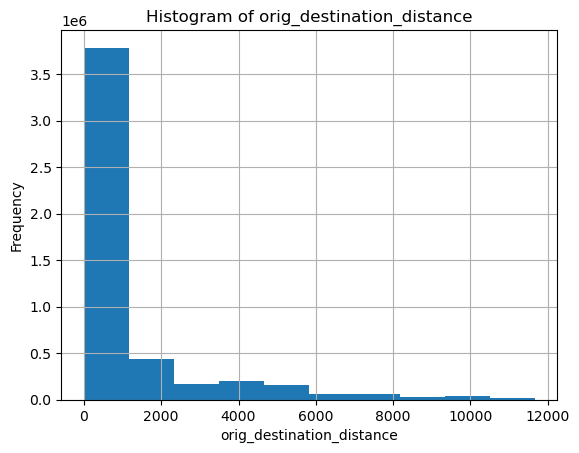

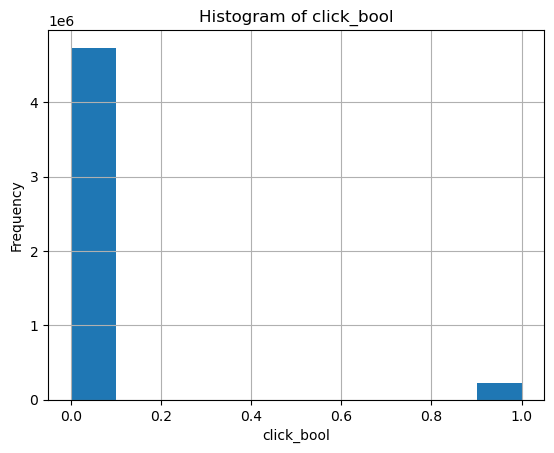

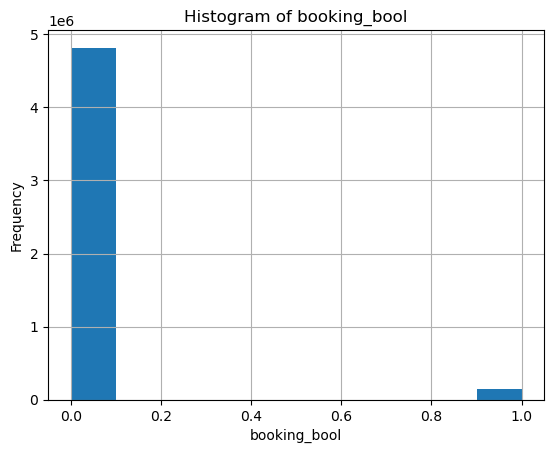

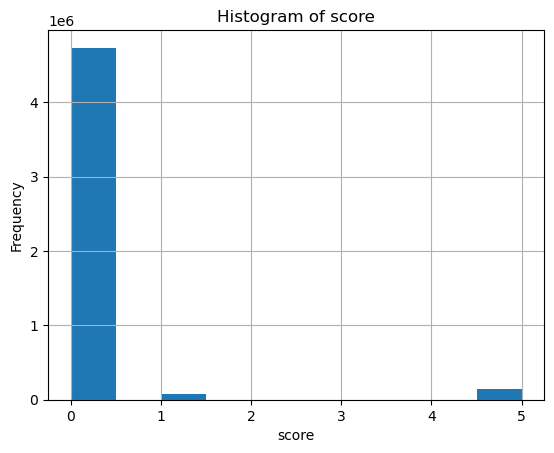

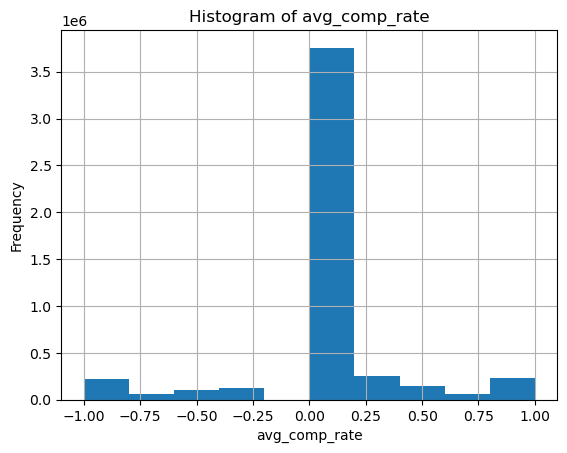

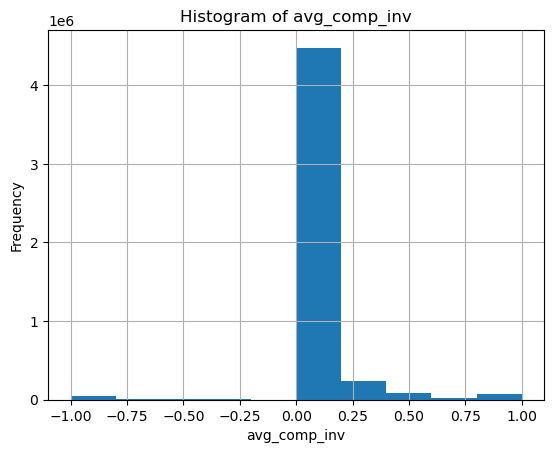

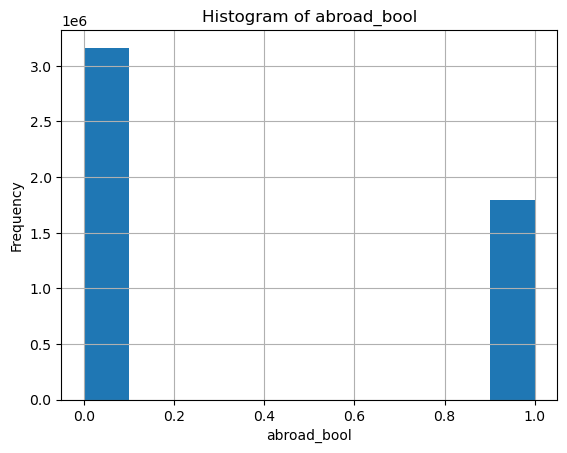

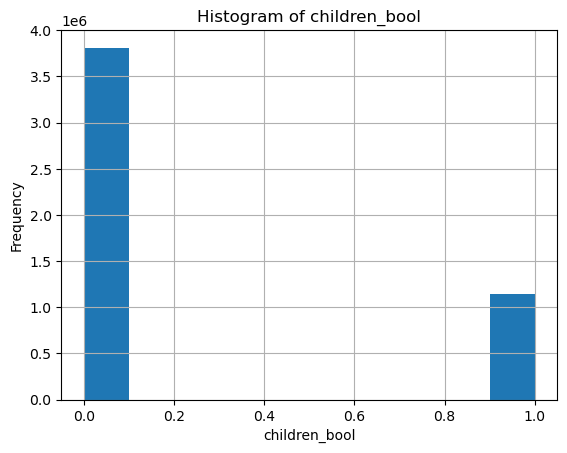

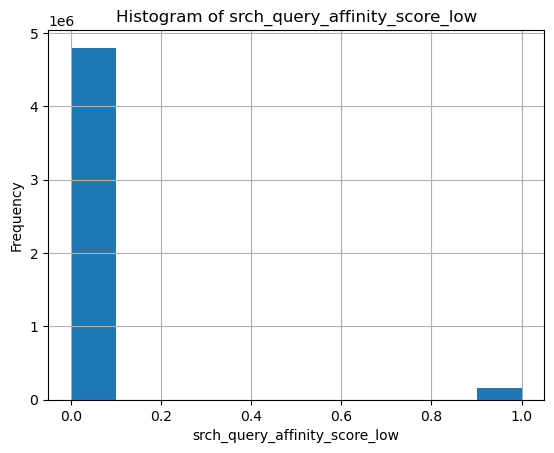

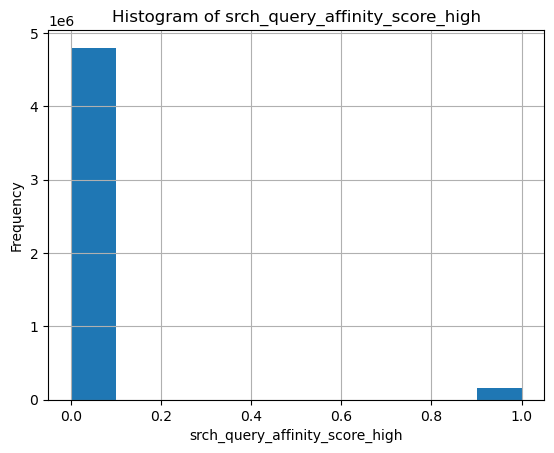

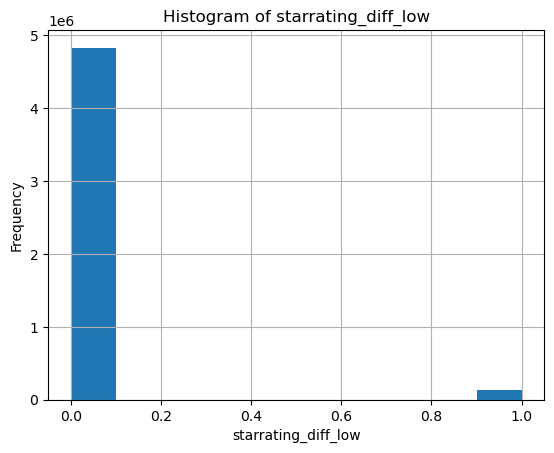

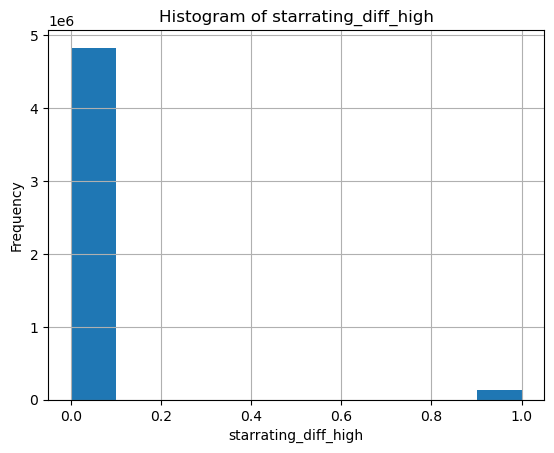

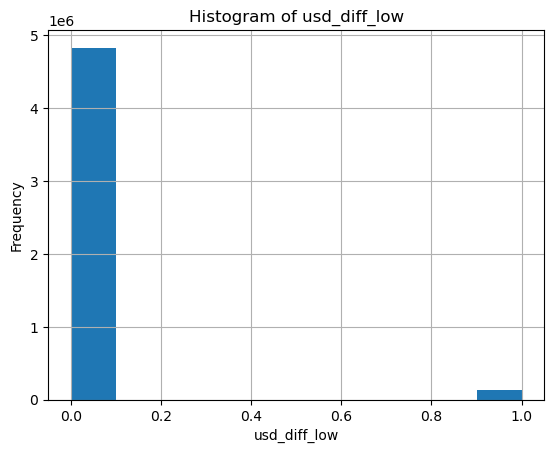

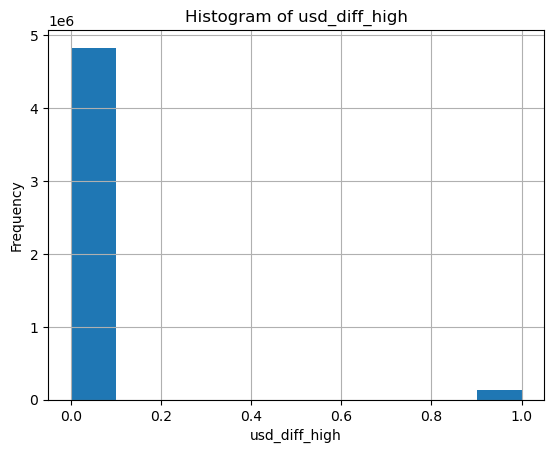

In [189]:
# Loop through columns to plot the final distributions
for col in df.columns:
    plt.figure()
    df[col].hist()
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

In [190]:
df.to_csv('df_OptionB.csv', index=False)